# **Citation Network Analysis**

### **Authors:** Khushkumar Kantaria (201901299) & Meet Sable (201901442)

### **Course:** Complex Networks (Semester 7)

### **Guide:** Prof. Mukesh Tiwari

### **College:** Dhirubhai Ambani Institute of Information and Communication Technology

## Required Imports

In [52]:
import numpy as np
import pandas as pd
import scipy as sp

import networkx as nx
import matplotlib.pyplot as plt
from itertools import count
import itertools

## Network level analysis

In [3]:
with open('./Lederberg.net', 'r', encoding='utf-8') as f:
    reading_vertices = False
    reading_edges = False
    node_label = {}
    edges = {}
    for i, line in enumerate(f):
        if not line.startswith('%'):
            if line.startswith('*'):
                if line.startswith('*vertices'):
                    reading_vertices = True
                elif line.startswith('*arcslist'):
                    reading_vertices = False
                    reading_edges = True
            else:
                if reading_vertices:
                    data = line.strip().split(' ', 1)
                    node_label[data[0]] = data[1]
                elif reading_edges:
                    data = line.strip().split()
                    edges[data[0]] = data[1:]
g = nx.DiGraph()
for i in edges.keys():
    for js in edges[i]:
        g.add_edge(i, js)
nx.info(g)

'DiGraph with 8324 nodes and 41601 edges'

In [4]:
g.remove_edges_from(nx.selfloop_edges(g))
nx.info(g)
nx.set_node_attributes(g, node_label, 'name')


### In-degree distribution

In [5]:
for i in sorted(list(g.in_degree()), key= lambda x: x[1], reverse=True)[:10]:
    print(i[0], i[1])

3475 135
3499 106
1641 85
979 84
1899 74
818 66
3786 65
3211 64
4262 62
8358 59


### Out-degree distribution

In [6]:
for i in sorted(list(g.out_degree()), key= lambda x: x[1], reverse=True)[:10]:
    print(i[0], i[1])

232 1098
1122 482
129 433
239 430
121 402
652 340
557 312
2413 291
1938 269
24 232


### Degree distribution

In [7]:
for i in sorted(list(g.degree()), key= lambda x: x[1], reverse=True)[:10]:
    print(i[0], i[1])

232 1103
1122 491
129 452
239 445
121 406
652 346
557 333
2413 295
1938 283
24 238


In [8]:
degrees = [i[1] for i in list(g.degree())]
in_degrees = [i[1] for i in list(g.in_degree())]
out_degrees = [i[1] for i in list(g.out_degree())]
print("Max Degree:", max(degrees))
print("Min Degree:", min(degrees))
print("Max In Degree:", max(in_degrees))
print("Min In Degree:", min(in_degrees))
print("Max Out Degree:", max(out_degrees))
print("Min Out Degree:", min(out_degrees))

Max Degree: 1103
Min Degree: 1
Max In Degree: 135
Min In Degree: 0
Max Out Degree: 1098
Min Out Degree: 0


### Degree distribution graph

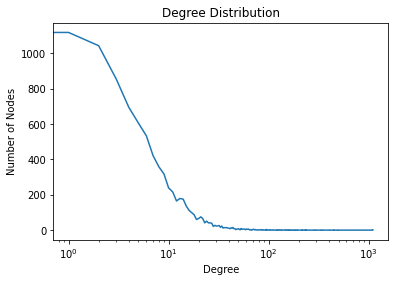

In [9]:
plt.plot(nx.degree_histogram(g))
plt.xlabel('Degree')
plt.xscale('log')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution')
plt.show()

### In- & Out-degree distribution graph

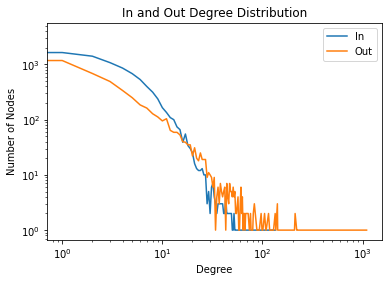

In [10]:
plt.loglog(*np.unique([i[1] for i in list(g.in_degree())], return_counts=True))
plt.loglog(*np.unique([i[1] for i in list(g.out_degree())], return_counts=True))
plt.title('In and Out Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.legend(['In', 'Out'])
plt.show()

In [12]:
print("Density of the graph:", nx.density(g))

Density of the graph: 0.0006003840725979311


## Centrality Measures


### Degree Centrality

In [13]:
deg_cent = nx.degree_centrality(g)

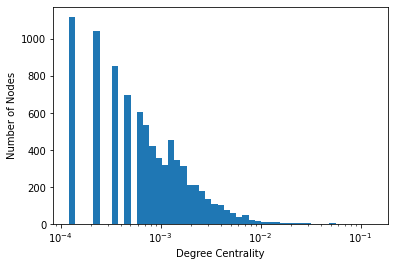

In [14]:
plt.hist(deg_cent.values(), bins=np.logspace(start=np.log10(min(deg_cent.values())), stop=np.log10(max(deg_cent.values()))))
plt.xscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Number of Nodes')
plt.show()

In [19]:
for i in sorted(list(deg_cent.items()), key= lambda x: x[1], reverse=True)[:10]:
    print(node_label[i[0]], i[1])

"LEDERBERG J" 0.13252433016941007
"LEDERBERG J" 0.05899315150786976
"LEDERBERG J" 0.05430734110296768
"ZINDER ND" 0.053466298209780126
"LEDERBERG J" 0.04878048780487805
"LEDERBERG J" 0.04157154872041331
"LENNOX ES" 0.04000961191877929
"GANESAN AT" 0.03544395049861829
"JACOB F" 0.03400216268172534
"LEDERBERG J" 0.028595458368376788


### In-degree Centrality

In [15]:
in_deg_cent = nx.in_degree_centrality(g)

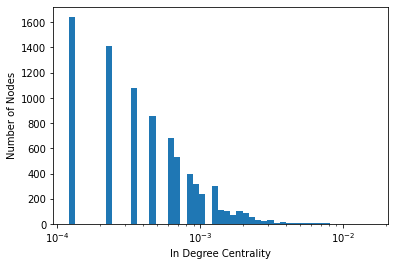

In [16]:
f_in_deg_cent = list(filter(lambda cent: cent != 0, list(in_deg_cent.values())))
plt.hist(f_in_deg_cent, bins=np.logspace(start=np.log10(min(f_in_deg_cent)), stop=np.log10(max(f_in_deg_cent))))
plt.xscale('log')
plt.xlabel('In Degree Centrality')
plt.ylabel('Number of Nodes')
plt.show()

In [20]:
for i in sorted(list(in_deg_cent.items()), key= lambda x: x[1], reverse=True)[:10]:
    print(node_label[i[0]], i[1])

"CURTISS R" 0.016220112940045658
"NOVICK RP" 0.012735792382554368
"CAMPBELL AM" 0.01021266370299171
"HARTMAN PE" 0.010092514718250631
"MARMUR J" 0.008891024870839842
"RAVIN AW" 0.00792983299291121
"JONES D" 0.007809684008170131
"MEYNELL E" 0.007689535023429052
"CLOWES RC" 0.007449237053946894
"Berlyn MKB" 0.0070887900997236575


### Out-degree centrality

In [17]:
out_deg_cent = nx.out_degree_centrality(g)

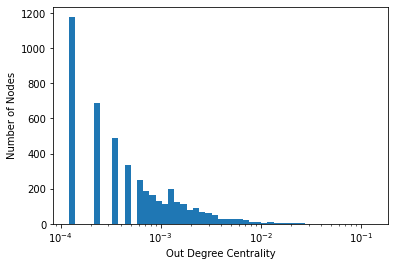

In [18]:
f_out_deg_cent = list(filter(lambda cent: cent != 0, list(out_deg_cent.values())))
plt.hist(f_out_deg_cent, bins=np.logspace(start=np.log10(min(f_out_deg_cent)), stop=np.log10(max(f_out_deg_cent))))
plt.xscale('log')
plt.xlabel('Out Degree Centrality')
plt.ylabel('Number of Nodes')
plt.show()

In [21]:
for i in sorted(list(out_deg_cent.items()), key= lambda x: x[1], reverse=True)[:10]:
    print(node_label[i[0]], i[1])

"LEDERBERG J" 0.13192358524570466
"LEDERBERG J" 0.05791181064520005
"LEDERBERG J" 0.05202451039288718
"ZINDER ND" 0.05166406343866394
"LEDERBERG J" 0.048299891865913734
"LEDERBERG J" 0.04085065481196684
"LENNOX ES" 0.03748648323921663
"GANESAN AT" 0.03496335455965397
"JACOB F" 0.032320076895350235
"LEDERBERG J" 0.027874564459930314


### Eigenvector centrality

In [22]:
eigenvector_cent = nx.eigenvector_centrality(g)

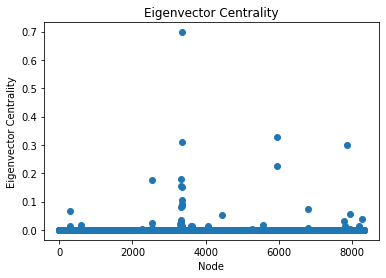

In [23]:
plt.scatter(range(len(eigenvector_cent.values())),eigenvector_cent.values())
plt.xlabel('Node')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality')
plt.show()

In [24]:
for i in sorted(list(eigenvector_cent.items()), key= lambda x: x[1], reverse=True)[:10]:
    print(i[0], i[1])

8756 0.6976306729939834
8509 0.32782646734083143
8310 0.3102210037400007
8454 0.30000130258775914
8314 0.22729463834996486
8163 0.17799750946995874
8346 0.17518115342191282
8309 0.15632513461222425
8508 0.15237649711021256
8488 0.10452466370989526


### Betweenness centrality

In [25]:
shortest_path_betweeness_cent = nx.betweenness_centrality(g)

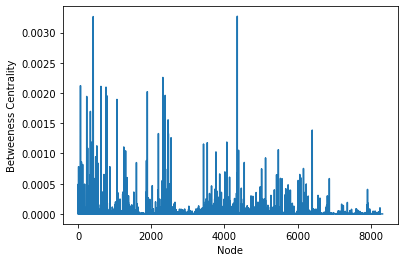

In [28]:
plt.plot(np.array(list(shortest_path_betweeness_cent.values())))
plt.xlabel('Node')
plt.ylabel('Betweeness Centrality')
plt.show()

In [29]:
for i in sorted(list(shortest_path_betweeness_cent.items()), key= lambda x: x[1], reverse=True)[:10]:
    print(node_label[i[0]], i[1])

"JACOB F" 0.0032696229980091838
"HARTMAN PE" 0.003264162051896279
"CLOWES RC" 0.002257380138821906
"CURTISS R" 0.002121669893592926
"COHN M" 0.002109393483088999
"LEDERBERG J" 0.002096917303922123
"HARTMAN PE" 0.0020223741785357235
"BRYSON V" 0.0019663479267193005
"MARMUR J" 0.0019603810422421
"LEDERBERG J" 0.0019550886720817325


### Closeness Centrality

In [30]:
closeness_cent = nx.closeness_centrality(g)

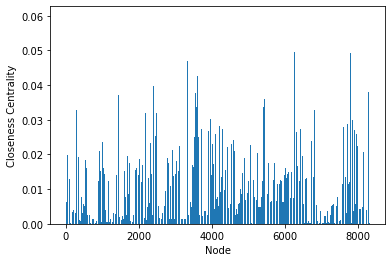

In [31]:
plt.bar(range(len(closeness_cent.values())), closeness_cent.values())
plt.xlabel('Node')
plt.ylabel('Closeness Centrality')
plt.show()

In [32]:
for i in sorted(list(closeness_cent.items()), key= lambda x: x[1], reverse=True)[:10]:
    print(node_label[i[0]], i[1])

"LOW KB" 0.05972783300472915
"Berlyn MKB" 0.056255350165995616
"Nielsen KM" 0.0546574512608008
"HOLLOWAY BW" 0.05436961216702675
"CONLEY EC" 0.05290470813104919
"Zahrt TC" 0.05117828256901248
"Frost LS" 0.05031572347680667
"SMITH GR" 0.050310497940565385
"Bastarrachea F" 0.05026613597141081
"RADICELLA JP" 0.05001080458405575


### Pagerank centrality

In [33]:
pagerank = nx.pagerank(g)

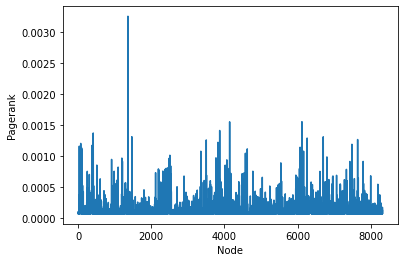

In [35]:
plt.plot(np.array(list(pagerank.values())))
plt.xlabel('Node')
plt.ylabel('Pagerank')
plt.show()

In [36]:
for i in sorted(list(pagerank.items()), key= lambda x: x[1], reverse=True)[:10]:
    print(node_label[i[0]], i[1])

"Berlyn MKB" 0.0032483998632808144
"MANSON MD" 0.0015498403137091128
"WHEELER HE" 0.001547760968730233
"LOW KB" 0.0014085566733552668
"HARTMAN PE" 0.0013678100956256
"HARDY KG" 0.0013092480208552449
"de_Julian-Ortiz JV" 0.0013066033588827533
"ZEIGLER DR" 0.0012864994670005773
"BURLINGAME AL" 0.001262868815736934
"JONES D" 0.0012559299177628185


## HITS Analysis

In [37]:
h, a = nx.hits(g)

### Hubs

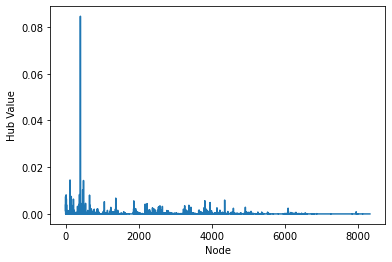

In [39]:
plt.figure()
plt.plot(np.array(list(h.values())))
plt.xlabel('Node')
plt.ylabel('Hub Value')
plt.show()

In [42]:
for i in sorted(list(h.items()), key=lambda t:t[1], reverse=True)[:10]:
    print(node_label[i[0]], i[1])

"LEDERBERG J" 0.0846209722806495
"LEDERBERG J" 0.014526931065216622
"LENNOX ES" 0.014305003933664405
"ZINDER ND" 0.013819291222277536
"LEDERBERG J" 0.010321220394977827
"DAVIS BD" 0.008289973679585389
"HAYES W" 0.008145785154159098
"LEDERBERG EM" 0.008040866398897709
"DAVIS BD" 0.007473287670433508
"LEDERBERG J" 0.007460309851115358


### Authorities

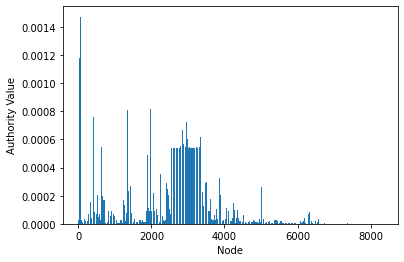

In [41]:
plt.figure()
plt.bar(range(len(a.values())), a.values())
plt.xlabel('Node')
plt.ylabel('Authority Value')
plt.show()

In [43]:
for i in sorted(list(a.items()), key=lambda t:t[1], reverse=True)[:10]:
    print(node_label[i[0]], i[1])

"CURTISS R" 0.0014737489508159156
"GILLISSEN G" 0.0013950262196629688
"LEDERBERG J" 0.0013541163636278258
"LEDERBERG J" 0.0013115235313524549
"CAMPBELL AM" 0.0012793221672148408
"RAVIN AW" 0.0012504687669119474
"RAVIN AW" 0.0011792172974170124
"LEDERBERG J" 0.0011513623705036889
"HAYES W" 0.0011478571103078832
"WOLLMAN EL" 0.001132677405054187


## Other values

### Transitivity

In [44]:
transitivity = nx.transitivity(g)
print("Transitivity:", transitivity)

Transitivity: 0.013564190192636836


### Assortativity

In [45]:
nx.degree_assortativity_coefficient(g)

-0.031604193308043045

## K-core

### Dataset

In [53]:
names = nx.get_node_attributes(g, 'Author').values()
mapping = dict(zip(names, count()))
nodes = g.nodes()
colors = [mapping[g.nodes[n]['Author']] for n in nodes]

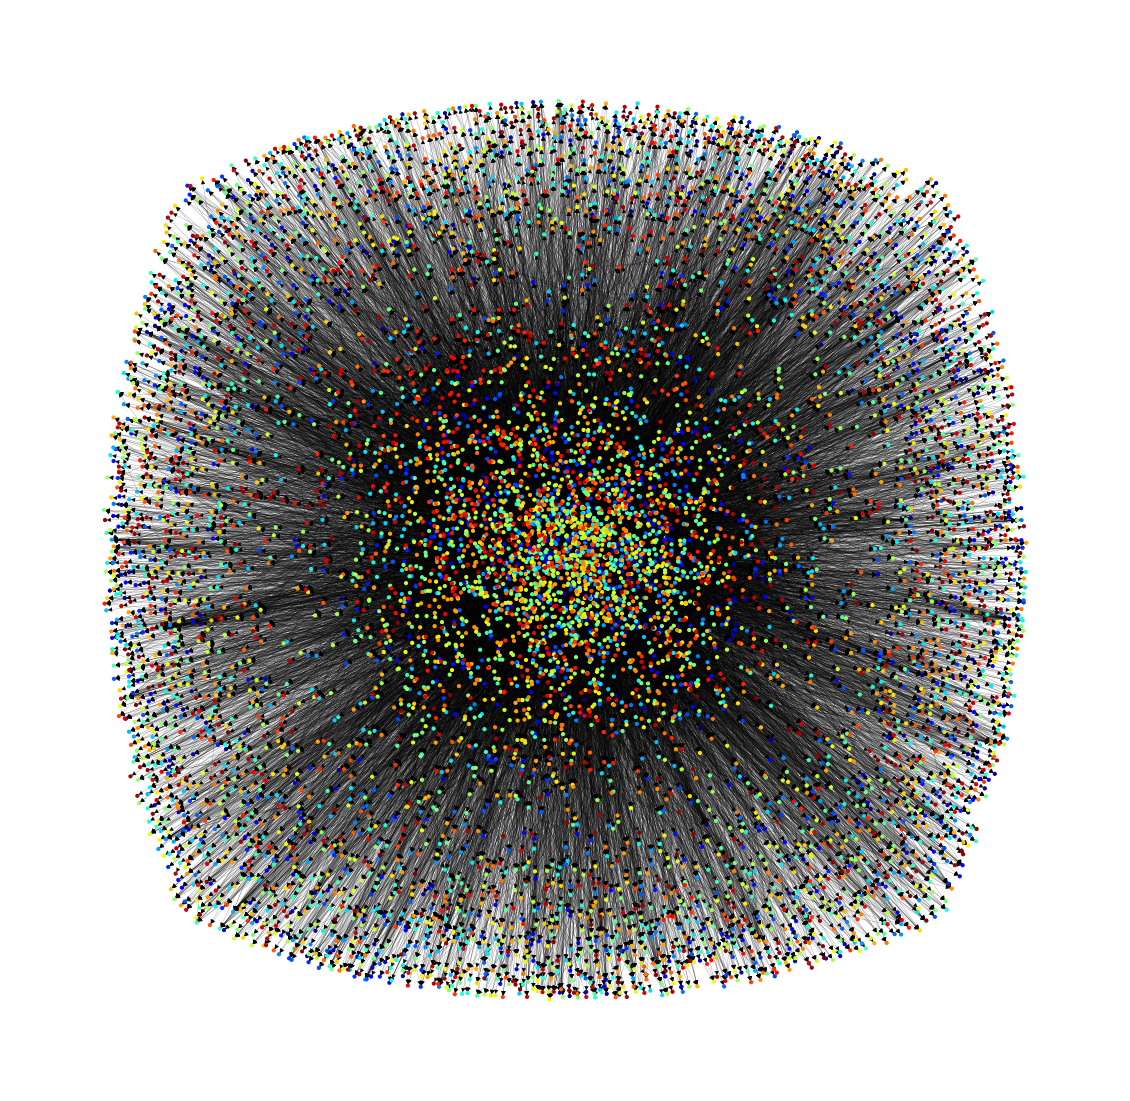

In [54]:
pos = nx.spring_layout(g, iterations=15, seed=1247)
fig, ax = plt.subplots(figsize=(20,20))
ax.axis('off')
nx.draw_networkx(g, pos=pos, ax=ax, node_size=10, node_color=colors, with_labels=False, width=0.15, cmap=plt.cm.jet)

### 5-core

In [55]:
k_core = nx.k_core(g, 5)
len(k_core)

4125

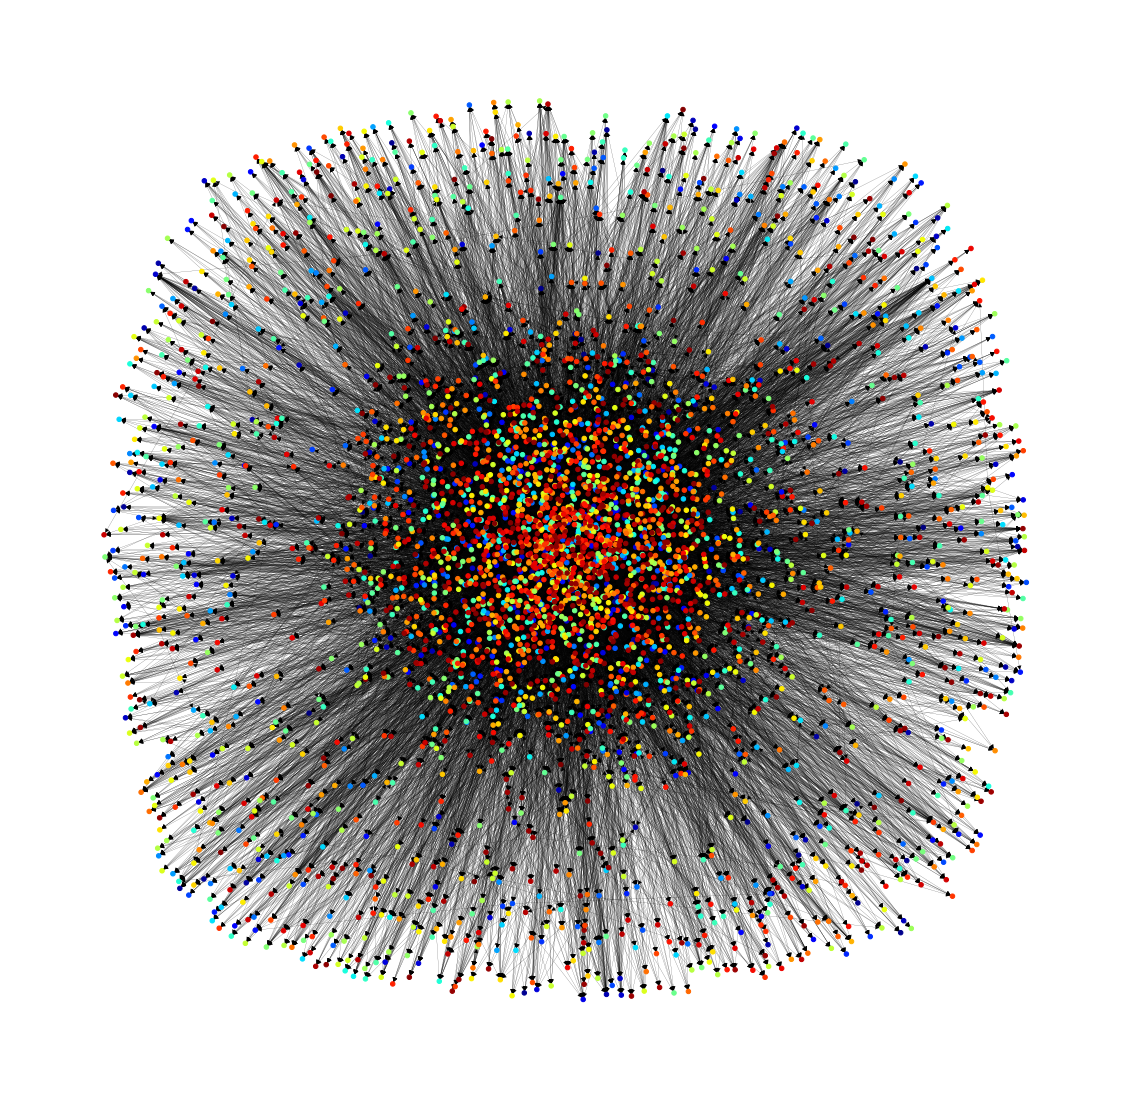

In [56]:
names = nx.get_node_attributes(k_core, 'Author').values()
mapping = dict(zip(names, count()))
nodes = k_core.nodes()
colors = [mapping[k_core.nodes[n]['Author']] for n in nodes]

pos = nx.spring_layout(k_core, iterations=15, seed=1247)
fig, ax = plt.subplots(figsize=(20,20))
ax.axis('off')
nx.draw_networkx(k_core, pos=pos, ax=ax, node_size=20, node_color=colors, with_labels=False, width=0.15, cmap=plt.cm.jet)

### 10-core

In [57]:
k_core = nx.k_core(g, 10)
len(k_core)

1319

In [58]:
names = nx.get_node_attributes(k_core, 'Author').values()
mapping = dict(zip(names, count()))
nodes = k_core.nodes()
colors = [mapping[k_core.nodes[n]['Author']] for n in nodes]

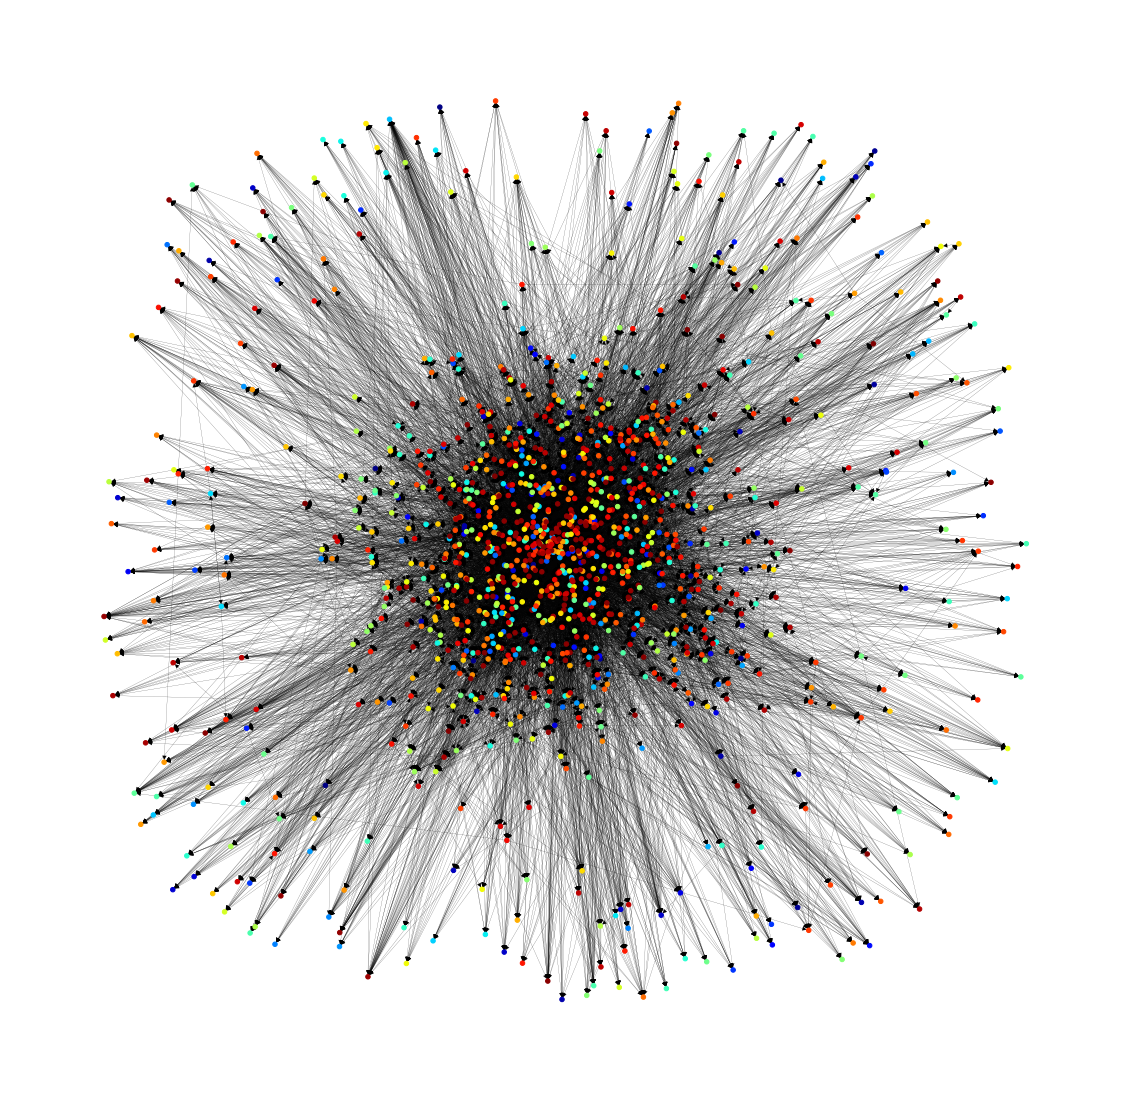

In [59]:
pos = nx.spring_layout(k_core, iterations=15, seed=1247)
fig, ax = plt.subplots(figsize=(20,20))
ax.axis('off')
nx.draw_networkx(k_core, pos=pos, ax=ax, node_size=20, node_color=colors, with_labels=False, width=0.15, cmap=plt.cm.jet)

### 15-core

In [60]:
k_core = nx.k_core(g, 15)
len(k_core)

195

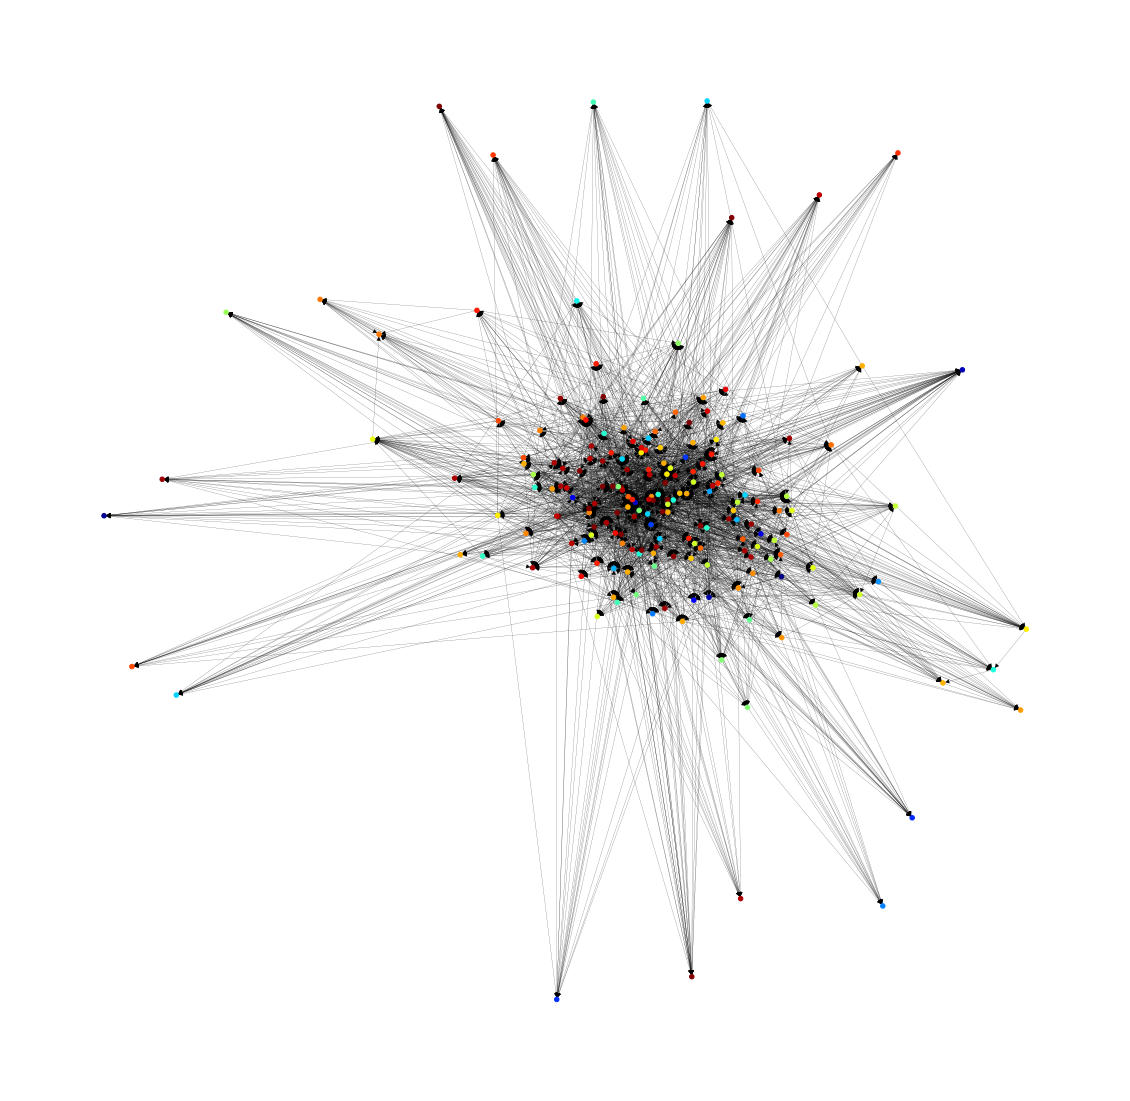

In [61]:
names = nx.get_node_attributes(k_core, 'Author').values()
mapping = dict(zip(names, count()))
nodes = k_core.nodes()
colors = [mapping[k_core.nodes[n]['Author']] for n in nodes]

pos = nx.spring_layout(k_core, iterations=15, seed=1247)
fig, ax = plt.subplots(figsize=(20,20))
ax.axis('off')
nx.draw_networkx(k_core, pos=pos, ax=ax, node_size=20, node_color=colors, with_labels=False, width=0.15, cmap=plt.cm.jet)